In [1]:

import numpy as np
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
wage = pd.read_csv('hourlywagedata.csv')
wage.head()

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338


In [3]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   position  3000 non-null   int64 
 1   agerange  3000 non-null   int64 
 2   yrsscale  3000 non-null   int64 
 3   hourwage  3000 non-null   object
dtypes: int64(3), object(1)
memory usage: 93.9+ KB


In [63]:
#### We are going to be cleaning up the data in one of the 4 variables

In [4]:

#convert the hourly wage values to float
wage['hourwage'] = pd.to_numeric(wage['hourwage'], errors='coerce') 



In [5]:
#Look at rows with mussing values
wage.isnull().sum() 

position     0
agerange     0
yrsscale     0
hourwage    89
dtype: int64

In [6]:
#droping the rows with missing values
wage.dropna(inplace = True)

In [7]:

wage.shape

(2911, 4)

1 position
2 agerange
3 yrsscale


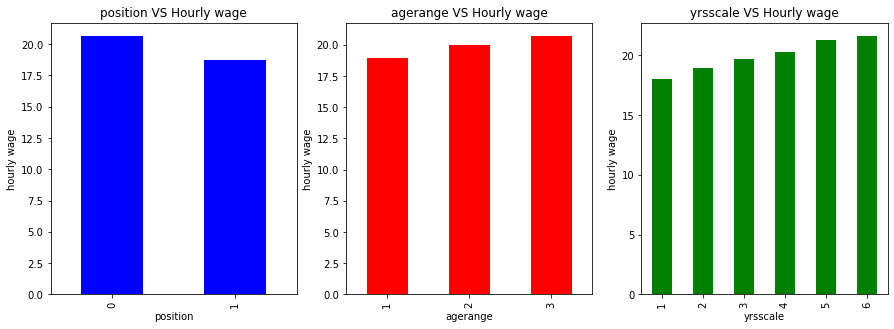

In [8]:

#We set up our plot figure size
plt.figure(figsize=(15,5))

#Generate three plots showing average hourly wage against the three categorical independent variable

for i,col,e in zip(range(1,4),['b','r','g'] , wage.columns):
    print(i,e)
    
    plt.subplot(1,3,i)
    
    wage['hourwage'].groupby(wage[e]).mean().plot(kind='bar',color=col)
    plt.title(e+' VS Hourly wage')
    plt.ylabel('hourly wage')

In [9]:
# identify and declare independant and dependent variables
X = wage.iloc[:, 0:3].values
y = wage.iloc[:,-1].values.reshape(-1,1)
print(X.shape, y.shape)

(2911, 3) (2911, 1)


In [30]:
#split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

print("Training data: ", X_train.shape, y_train.shape)
print("Test data: ", X_test.shape, y_test.shape)



Training data:  (2328, 3) (2328, 1)
Test data:  (583, 3) (583, 1)


In [31]:
#fit the model
lm = LinearRegression()
model = lm.fit(X_train, y_train)


In [32]:
#Wage prediction

predictions = model.predict(X_test)

In [33]:
predictions[0:5]

array([[18.80081326],
       [19.07676062],
       [19.71157611],
       [22.04463087],
       [20.58124348]])

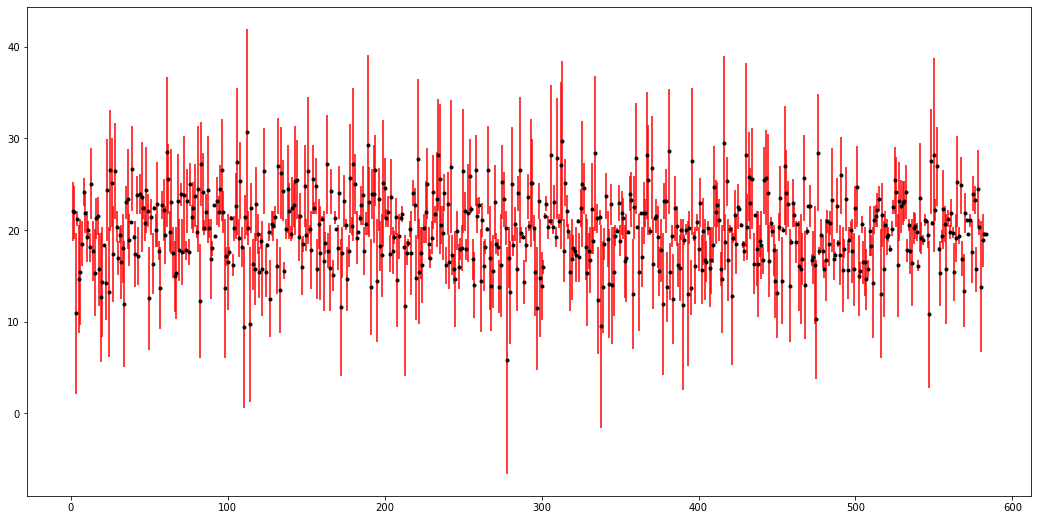

In [34]:


plt.figure(figsize=(18,9))

plt.errorbar(range(1, len(y_test)+1), y_test, yerr=(y_test-predictions), fmt='.k', ecolor="red");


In [14]:
#import a library to aid us in
#calculating and seeing the score of our predictions
from sklearn.metrics import r2_score   



In [15]:
#calculate the prediction score
r2_score(y_test, predictions)

0.1404950050621505

In [16]:
#calculate the RMSE
np.sqrt(((predictions - y_test)**2).mean()) 



3.620995824715535

In [17]:


print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)



Intercept: 
 [18.26672813]
Coefficients: 
 [[-1.9429325  -0.2818233   0.84876478]]


In [18]:
print ("Score:", model.score(X_test, y_test))

Score: 0.1404950050621505


In [ ]:
#This score is quite close to 0, which suggest that our model doesn't fit our observation quite well